# Proyek Analisis Data: Bike Sharing
- **Nama:** Annisa Hasna Salsabila
- **Email:** annisalsa.hasna@gmail.com / M002B4KX0579@bangkit.academy
- **ID Dicoding:** hasnanisalsa

## Menentukan Pertanyaan Bisnis



1. Apakah ada perbedaan signifikan untuk penyewaan sepeda antara hari libur dan hari biasa pada setiap bulan untuk tahun 2011 dan 2012?

2. Jam berapakah yang merupakan jam sibuk penyewaan sepeda pada hari kerja dan akhir pekan di tahun 2012?

3. Bagaimana distribusi penyewaan oleh pengguna biasa dengan penyewaan oleh pengguna terdaftar selama jam sibuk penyewaan di berbagai musim?

4. Bagaimana perbandingan tren bulanan penyewaan sepeda antara tahun 2011 dan 2012?

5. Apakah perubahan kecepatan angin yang signifikan dapat memengaruhi tren penyewaan sepeda pada hari kerja dan akhir pekan?



## Import Semua Packages/Library yang Digunakan

In [28]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime as dt
import zipfile

## Data Wrangling

### **1.Gathering Data**

In [29]:
# Tabel day dari dataset day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
# Tabel hour dari dataset hour.csv
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset "Bike Sharing" terdiri dari 2 file, yaitu **hour.csv** yang berisi jumlah penyewaan sepeda berdasarkan jam dengan records sebesar 17379 hours dan **day.csv** yang berisi jumlah penyewaan sepeda berdasarkan hari sebesar 731 hari.

**Karakteristik Dataset:**

hour.csv and day.csv memiliki kolom yang sama, tetapi day.csv ***tidak memilik kolom "hr"***.
* instant: record index
* dteday : tanggal
* season : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
* yr : tahun (0: 2011, 1:2012)
* mnth : bulan ( 1 to 12)
* hr : jam (0 to 23)
* holiday : hari sedang libur atau tidak (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : hari pada minggu
* workingday : jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0
* weathersit : (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
* temp : suhu normal dalam Celsius. Nilainya dibagi 41 (max)
* atemp : suhu perasaan dinormalisasi dalam Celcius. Nilainya dibagi 50 (maks)
* hum : kelembaban yang dinormalisasi. Nilainya dibagi menjadi 100 (maks)
* windspeed : kecepatan angin dinormalisasi. Nilainya dibagi menjadi 67 (maks)
* casual : jumlah pengguna biasa
* registered: jumlah pengguna terdaftar
* cnt : hitungan total sepeda sewaan termasuk sepeda kasual dan terdaftar


### **2. Assessing Data**

#### ***2.1. Data Type***

In [31]:
# Memeriksa tipe data day.csv
print('Dataframe day:')
print(day_df.info())

# Memeriksa tipe data day.csv
print('\nDataframe hour:')
print(hour_df.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

**IMPORTANT NOTE!**

Terdapat kesalahan pada jenis data kolom "dteday". Tertera bahwa tipe data "dteday" adalah **object** dimana seharusnya berupa tipe data **datetime**.



#### ***2.2. Missing Value***

In [32]:
# Memeriksa missing value di dataset hour.csv
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [33]:
# Memeriksa missing value di dataset day.csv
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**IMPORTANT NOTE!**

Dari pemeriksaan dataset, tidak ada missing value.


#### ***2.3. Duplicate Data***

In [34]:
# Memeriksa duplikasi
print("Duplikasi dataframe hour:", hour_df.duplicated().sum())
print("Duplikasi dataframe day:", day_df.duplicated().sum())

Duplikasi dataframe hour: 0
Duplikasi dataframe day: 0


**IMPORTANT NOTE!**

Dari pemeriksaan dataset, tidak ada duplikasi data.

#### ***2.4. Descriptive Statistics***

In [35]:
# Memeriksa statistik deskriptif dari dataframe day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Analisis Dataset day_df**

*   Jumlah data: 731
*   Musim dominan: 2 (musim panas)
*   Tahun dominan: 1 (2012)
*   Bulan dominan: 7 (Juli)
*   Hari libur: 2.8728% dari total kesluruhan hari
*   Hari kerja: 68.3995% dari total keseluruhan hari
*   Cuaca rata-rata: 1 (weathersit dalam keadaan baik)
*   Suhu rata-rata: 0.50 (max 41°C)
*   Suhu perasaan rata-rata: 0.47 (max 50°C)
*   Kelembaban rata-rata: 0.63 (max 100%)
*   Kecepatan angin rata-rata: 0.19 (67% dari maksimal)
*   Pengguna casual rata-rata: 848
*   Pengguna terdaftar rata-rata: 3656
*   Total rental rata-rata: 4504 per hari

In [36]:
# Memeriksa statistik deskriptif dari dataframe hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Analisis Dataset hour_df**

*   Jumlah data: 17,379
*   Musim dominan: 2.50
*   Tahun dominan: 0.50 (perbandingan antara 2011 dan 2012)
*   Bulan dominan: 6.54 (bulan rata-rata dalam setahun)
*   Jam: 11.5 (jam rata-rata dalam sehari)
*   Hari libur: 0.028770 (persentase hari libur)
*   Hari dalam seminggu: 3.003683 (hari rata-rata dalam seminggu)
*   Hari kerja: 0.682721 (persentase hari kerja)
*   Cuaca rata-rata: 1.43
*   Suhu rata-rata: 0.50 (suhu rata-rata normal)
*   Suhu perasaan rata-rata: 0.48 (suhu perasaan mendekata suhu sebenarnya)
*   Kelembaban rata-rata: 0.48
*   Kecepatan angin rata-rata: 0.63
*   Pengguna casual rata-rata: 35.68
*   Pengguna terdaftar rata-rata: 153.79
*   Total rental rata-rata: 189.46

### **3. Cleaning Data**

#### ***3.1. Mengganti Tipe Data***

Terdapat kesalahan tipe data pada "dteday" sehingga akan diganti.

In [37]:
# Mengganti tipe data pada dataframe day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengganti tipe data pada dataframe hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [38]:
# Mengecek kembali tipe data untuk dataframe day_df dan hour_df
print('Tipe data day_df["dteday"]:', day_df["dteday"].dtypes)
print('Tipe data hour_df["dteday"]:', hour_df["dteday"].dtypes)

Tipe data day_df["dteday"]: datetime64[ns]
Tipe data hour_df["dteday"]: datetime64[ns]


## Exploratory Data Analysis (EDA)

### **1. Eksplorasi Data hour_df**

In [39]:
# Melihat rangkuman parameter statistik dari data hour_df menggunakan method describe()
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik diperoleh informasi:
1. Jumlah pelanggan sebanyak 17,379.
2. Penyewaan sepeda paling banyak dilakukan pada musim Fall sebesar 4496.
3. Penyewaan sepeda paling banyak dilakukan pada tahun 2012 sebesar 8734.
4. Penyewaan sepeda paling banyak dilakukan bulai Mei sebesar 1488.
5. Rata-rata penyewaan sepeda dilakukan pada jam 11.54 di antara range pukul 00.00 hingga 23.59 dengan standar deviasi sebesar 6.91.
6. Penyewaan sepeda paling banyak dilakukan hari Sabtu sebesar 2512.
7. Penyewaan sepeda banyak dilakuka ketika kondisi cuaca adalah cerah dan berawan.

#### ***1.1. EDA hour_df - Penyewaan Sepeda Berdasarkan Jam***


In [40]:
hour_df = pd.read_csv('hour.csv')

# Penyewaan sepeda berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


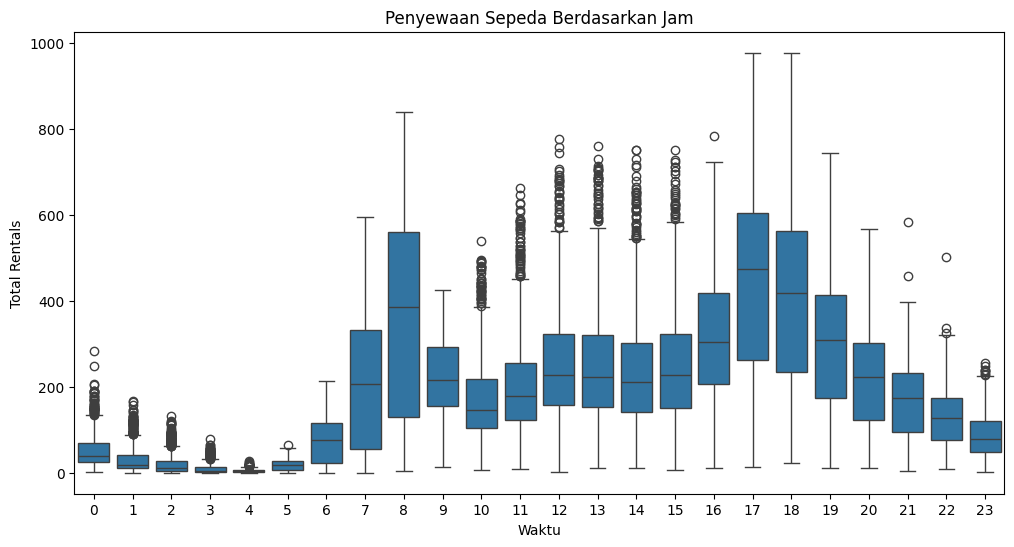

In [41]:
hour_df = pd.read_csv('hour.csv')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Waktu')
plt.ylabel('Total Rentals')
plt.show()

Berdasarkan pivot table dan grafik boxplot, dapat didapatkan infromasi:
1. Penyewaan sepeda paling banyak dilakukan pukul 17.00 sebanyak 336,860.
2. Penyewaan sepeda paling sedikit dilakukan pukul 04.00 sebanyak 4428.

### **2. Eksplorasi Data day_df**

In [42]:
# Melihat rangkuman parameter statistik dari data day_df menggunakan method describe()
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### ***2.1. EDA day_df - Penyewaan Sepeda Berdasarkan Tanggal (dteday)***

In [43]:
day_df = pd.read_csv('day.csv')

# Penyewaan sepeda berdasarkan dteday
day_df.groupby(by="dteday").agg({
    "cnt": ["sum"]
})

,cnt
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


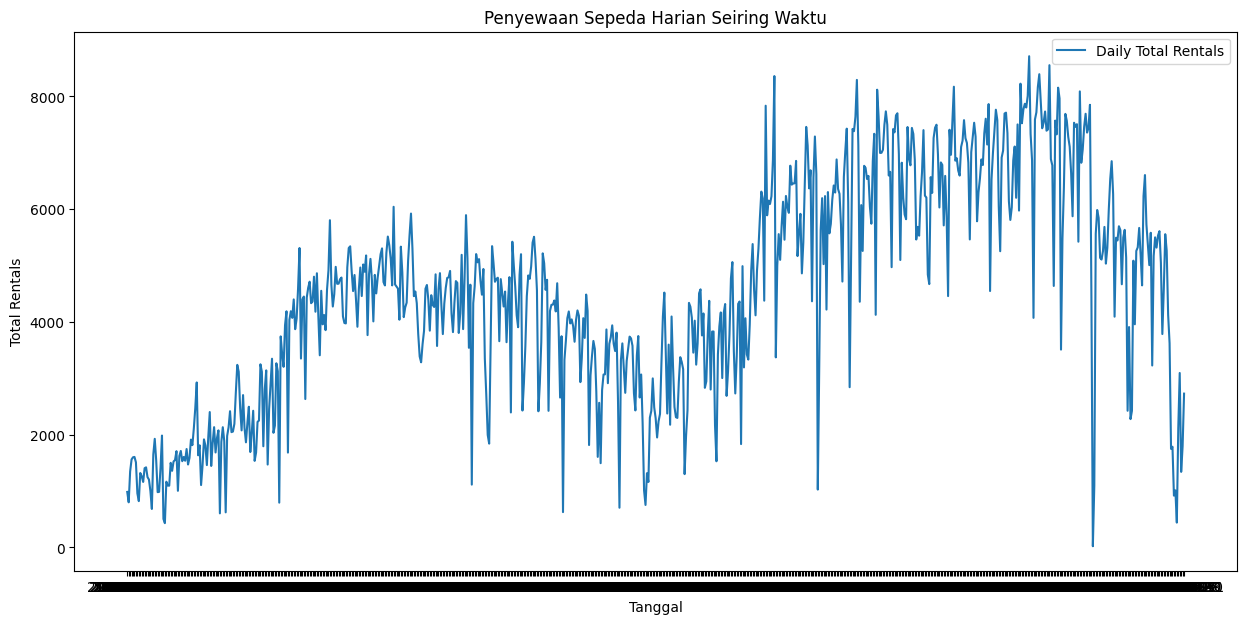

In [44]:
day_df = pd.read_csv('day.csv')

# Plot
plt.figure(figsize=(15, 7))
plt.plot(day_df['dteday'], day_df['cnt'], label='Daily Total Rentals')
plt.title('Penyewaan Sepeda Harian Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

Berdasarkan pivot table dan line chart, dapat didapatkan infromasi:
1. Penyewaan sepeda dari Januari 2011 hingga Januari 2013 berfluktuasi.
2. Penyewaan sepeda dari Januari 2011 hingga Juli 2011 mengalami kenaikan, tetapi dari Juli 2011 hingga Januari 2012 mulai mengalami penurunan.
3. Penyewaan tertinggi terjadi di tahun 2012 dibandingkan tahun 2011.

#### ***2.2. EDA day_df - Penyewaan Sepeda Berdasarkan Musim (season)***

In [45]:
day_df = pd.read_csv('day.csv')

# Penyewaan sepeda berdasarkan season
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


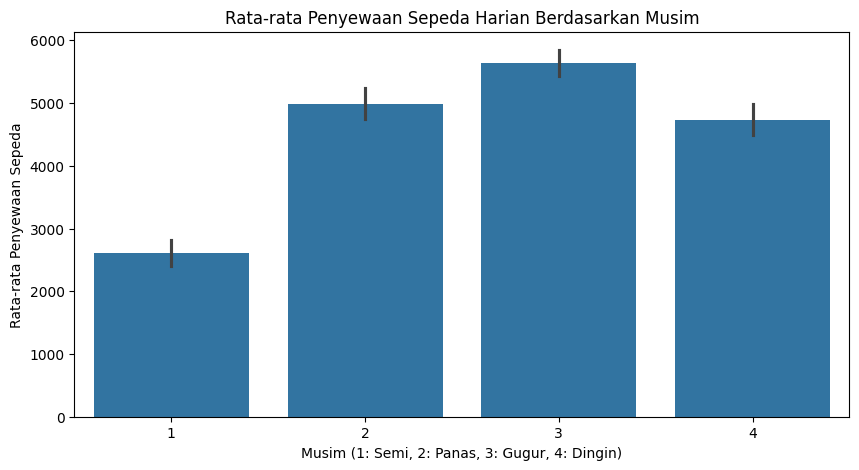

In [46]:
day_df = pd.read_csv('day.csv')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=day_df, estimator=np.mean)
plt.title('Rata-rata Penyewaan Sepeda Harian Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

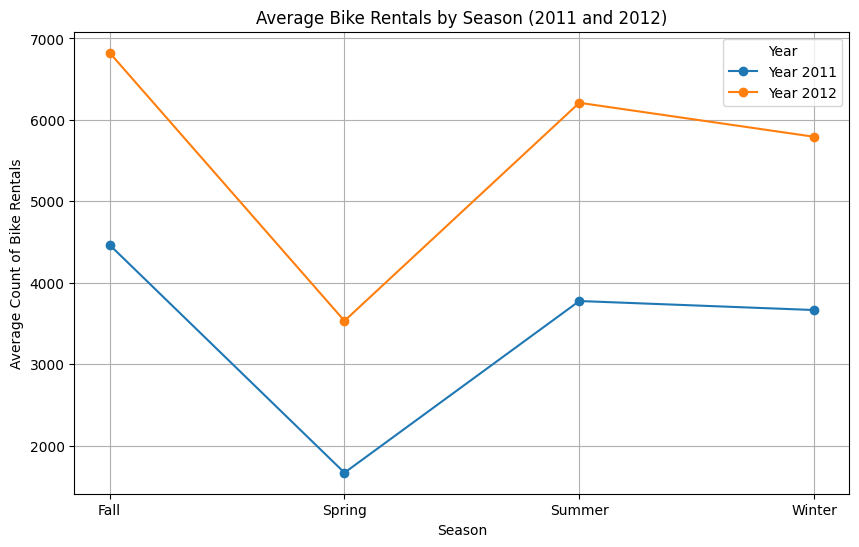

In [47]:
day_df = pd.read_csv('day.csv')

# Perbandingan Penyewaan Sepeda Berdasarkan Musim pada 2011 dan 2012

# Mapping seasons dari angka ke nama-nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df['season'] = day_df['season'].map(season_mapping)

# Data dipisahkan berdasarkan musim dan tahun, lalu dihitung nilai rata-rata penyewaan sepeda
seasonal_data = day_df.groupby(['yr', 'season'])['cnt'].mean().unstack(level=0)

# Plot
plt.figure(figsize=(10, 6))
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], marker='o', label=f"Year {2011 + year}")

plt.title('Average Bike Rentals by Season (2011 and 2012)')
plt.xlabel('Season')
plt.ylabel('Average Count of Bike Rentals')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Berdasarkan pivot table dan bar chart, dapat didapatkan infromasi:
1. Penyewaan sepeda terjadi paling banyak di musim gugur sebesar 1061129 sepanjang tahun 2011 hingga 2012.
2. Penyewaan sepeda terjadi paling sedikit di musim semi sebesar 471348 sepanjang tahun 2011 hingga 2012.
3. Penyewaan sepeda dari paling banyak hingga paling sedikit berdasarkan musim adalah musim gugur, musim panas, musim dingin, lalu musim semi.

Berdasarkan line chart untuk perbandingan tahun 2011 dan 2012, didapat informasi:
1. Penyewaan sepeda paling banyak terjadi di musim gugur, baik pada tahun 2011 maupun 2012.
2. Ada penurunan penyewaan sepeda dari musim panas ke musim dingin dengan asumsi alasan bahwa musim dingin memiliki cuaca yang kurang untuk melakukan penyewaan sepeda.
3. Tren untuk tahun 2011 dan 2012 cenderung konsisten.

#### ***2.3. EDA day_df - Penyewaan Sepeda Berdasarkan Kondisi Cuaca (weathersit)***

In [48]:
day_df = pd.read_csv('day.csv')

# Penyewaan sepeda berdasarkan weather situation
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


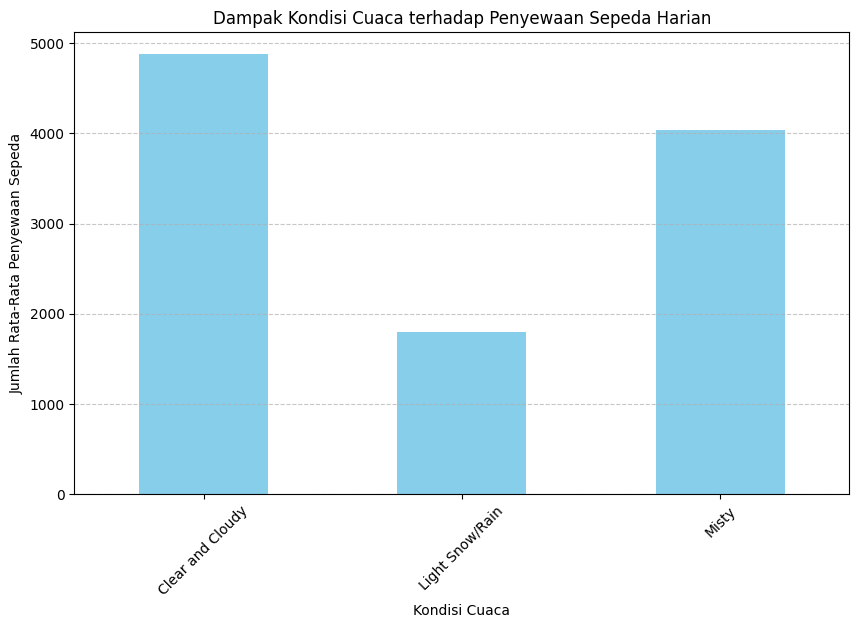

In [49]:
day_df = pd.read_csv('day.csv')

# Mapping kondisi cuaca dari angka ke nama-nama cuaca
weather_mapping = {
    1: "Clear and Cloudy",
    2: "Misty",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)
weather_data = day_df.groupby(['weathersit'])['cnt'].mean()

# Plot
plt.figure(figsize=(10, 6))
weather_data.plot(kind='bar', color='skyblue')
plt.title('Dampak Kondisi Cuaca terhadap Penyewaan Sepeda Harian')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rata-Rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Kondisi Cuaca
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

Berdasarkan pivot table dan bar chart, dapat didapatkan infromasi:
1. Penyewaan sepeda terjadi ketika cuaca cerah dan berawan.
2. Tidak ada satupun orang yang menyewa sepeda ketika kondisi cuaca hujan lebat, palet es, badai petir, kabut, dan salju (kondisi weather situation 4)

## Visualization & Explanatory Analysis

### **Pertanyaan 1: Apakah ada perbedaan signifikan untuk penyewaan sepeda antara hari libur dan hari biasa pada setiap bulan untuk tahun 2011 dan 2012?**

*   Specific: Melakukan analisi perbedaan volume penyewaan sepeda pada hari libur dan hari biasa.
*   Measurable: Menggunakan kolom **holiday** dan **cnt**.
*   Action-oriented: Menggunakan box plot untuk membandingkan distribusi penyewaan sepeda pada hari libur dan hari biasa setiap bulannya.
*   Relevant: Mengidentifikasi potensi penyesuaian dalam alokasi sepeda untuk liburan.
*   Time-bound: Data bulanan sepanjang 2011 dan 2012.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

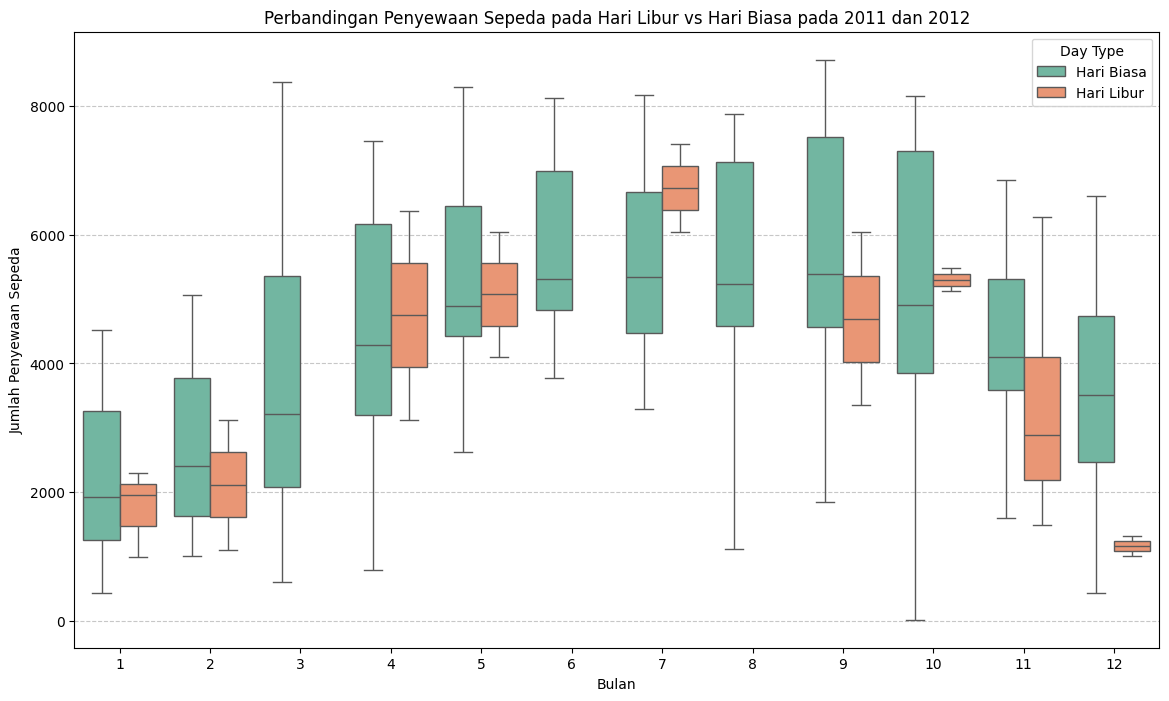

In [50]:
day_df = pd.read_csv('day.csv')

# Mapping year dari numeric ke string
day_df['yr'] = day_df['yr'].map({0: "2011", 1: "2012"})

# Membuat kolom "Hari Libur" dan "Hari Biasa"
day_df['Day Type'] = day_df['holiday'].map({0: "Hari Biasa", 1: "Hari Libur"})

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='mnth', y='cnt', hue='Day Type', data=day_df, palette='Set2')
plt.title('Perbandingan Penyewaan Sepeda pada Hari Libur vs Hari Biasa pada 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Day Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analisis Jawaban**

*   Hari biasa cenderung memiliki median yang lebih tinggi dan distribusi persewaan sepeda yang lebih luas dibandingkan hari libur.
*   Hari libur menunjukkan lebih banyak variabilitas dengan jumlah sewa yang umumnya lebih rendah.

### **Pertanyaan 2: Jam berapakah yang merupakan jam sibuk penyewaan sepeda pada hari kerja dan akhir pekan di tahun 2012?**

*   Specific: Melakukan analisis jam permintaan tertinggi untuk penyewaan sepeda pada hari kerja dan akhir pekan.
*   Measurable: Menggunakan kolom **hr**, **workingday**, dan **cnt**.
*   Action-oriented: Menggunakan line graph untuk melakukan plotting penyewaan sepeda per jam pada hari kerja dan akhir pekan.
*   Relevant: Membantu alokasi penyewaan sepeda secara strategis selama jam sibuk.
*   Time-bound: Data tahun 2012.

<ipython-input-51-de619acc7440>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_2012['Day Type'] = hour_2012['workingday'].map({0: "Akhir Pekan", 1: "Hari Kerja"})


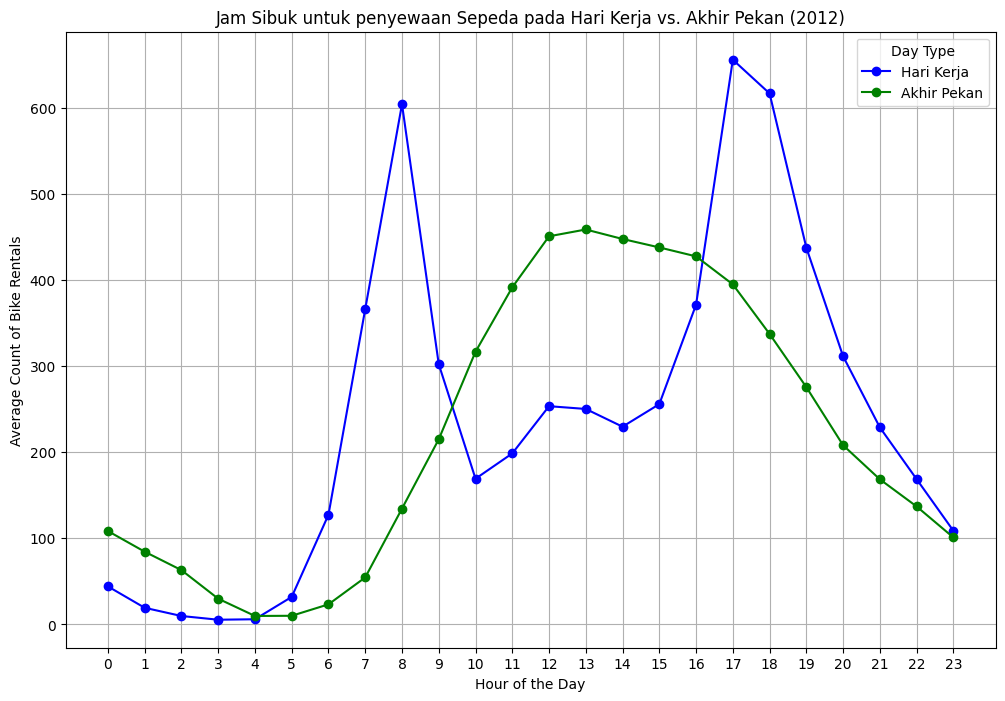

In [51]:
hour_df = pd.read_csv('hour.csv')

# Melakukan filter data agar menampilkan tahun 2012
hour_2012 = hour_df[hour_df['yr'] == 1]

# Mapping workingday dari numeric ke string
hour_2012['Day Type'] = hour_2012['workingday'].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Melakukan pemisahan data berdasarkan tipe hari dan jam
hourly_data_2012 = hour_2012.groupby(['Day Type', 'hr'])['cnt'].mean().unstack(level=0)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(hourly_data_2012['Hari Kerja'], label='Hari Kerja', color='blue', marker='o')
plt.plot(hourly_data_2012['Akhir Pekan'], label='Akhir Pekan', color='green', marker='o')
plt.title('Jam Sibuk untuk penyewaan Sepeda pada Hari Kerja vs. Akhir Pekan (2012)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Bike Rentals')
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.grid(True)
plt.show()

**Analisis Jawaban**

* Pada hari kerja, penyewaan sepeda paling tinggi terjadi pada jam berangkat dan pulang kerja. Penyewaan paling tinggi terjadi pada jam 08.00 dan 17.00. Hal ini menunjukkan bahwa ada korelasi antara jam pulang-pergi kerja dan penyewaan sepeda.
* Pada akhir pekan, kurva permintaan lebih tersebar dan mencapai puncaknya pada siang hari. Permintaan untuk penyewaan sepeda tertinggi terjadi mulai pukul 12.00 hingga 16.00. Hal ini menunjukkan bahwa terdapat penyewaan sepeda untuk rekreasi dibandingkan perjalanan pulang pergi.

### **Pertanyaan 3: Bagaimana distribusi penyewaan oleh pengguna biasa dengan penyewaan oleh pengguna terdaftar selama jam sibuk penyewaan di berbagai musim?**

*   Specific: Melakukan analisis perbedaan jenis pengguna (biasa vs. terdaftar) selama jam sibuk di musim yang berbeda.
*   Measurable: Fokus pada jam sibuk (diidentifikasi dari pertanyaan 2), lalu membandingkan data pada kolom **casualt** dan **registered**.
*   Action-oriented: Menggunakan stacked bar chart untuk menunjukkan distribusi jenis pengguna selama jam sibuk untuk setiap musim.
*   Relevant: Meningkatkan pemahaman tentang dinamika pengguna.
*   Time-bound: Analisis pada jam sibuk untuk setiap musim.





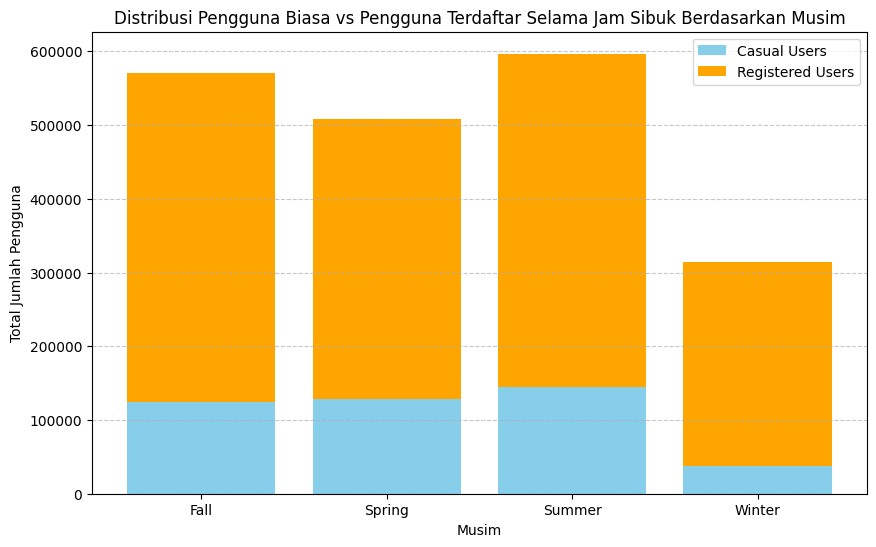

In [52]:
hour_df = pd.read_csv('hour.csv')

# Pembagian musim berdasarkan bulan
def get_season(month):
    if month in [3, 4, 5]:      # Musim semi
        return 'Spring'
    elif month in [6, 7, 8]:    # Musim panas
        return 'Summer'
    elif month in [9, 10, 11]:  # Musim gugur
        return 'Fall'
    else:                       # Musim dingin
        return 'Winter'

hour_df['season'] = hour_df['mnth'].apply(get_season)

# Memfilter data hanya untuk jam sibuk yang relevan (sesuai dengan jawabam untuk pertanyaan 2)
peak_hours = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
peak_hour_data = hour_df[hour_df['hr'].isin(peak_hours)]

# Mengelompokkan data berdasarkan musim dan menghitung total pengguna biasa dan terdaftar
seasonal_peak_users = peak_hour_data.groupby('season')[['casual', 'registered']].sum().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(seasonal_peak_users['season'], seasonal_peak_users['casual'], label='Casual Users', color='skyblue')
plt.bar(seasonal_peak_users['season'], seasonal_peak_users['registered'], bottom=seasonal_peak_users['casual'],
        label='Registered Users', color='orange')

plt.title('Distribusi Pengguna Biasa vs Pengguna Terdaftar Selama Jam Sibuk Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Pengguna')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analisis Jawaban**

*   Casual user (warna biru) melakukan penyewaan pada semua musim, dimana jumlahnya relatif lebih tinggi di musim semi dan musim panas. Tren ini menunjukkan bahwa casual users melakukan penyewaan sepeda ketika cuaca sedang hangat.
*   Registered user (warna oranye) mendominasi jumlah total di semua musim, terutama di musim panas. Hal ini menunjukkan bahwa registered user cenderung bersepeda lebih konsisten sepanjang tahun dibandingkan pengguna biasa. Hal ini disebabkan karena mereka memiliki keanggotaan.


### **Pertanyaan 4: Bagaimana perbandingan tren bulanan penyewaan sepeda antara tahun 2011 dan 2012?**

*   Specific: Melakukan analisis tren penyewaan sepeda bulanan sepanjang tahun 2011 dan 2012.
*   Measurable: Menggunakan kolom **mnth** dan **cnt**.
*   Action-oriented: Menggunakan line graph untuk membandingkan penyewaan sepeda setiap bulan selama dua tahun.
*   Relevant: Memahami tren bulanan membantu dalam merencanakan fluktuasi permintaan.
*   Time-bound: Data tahun 2011 dan 2012.


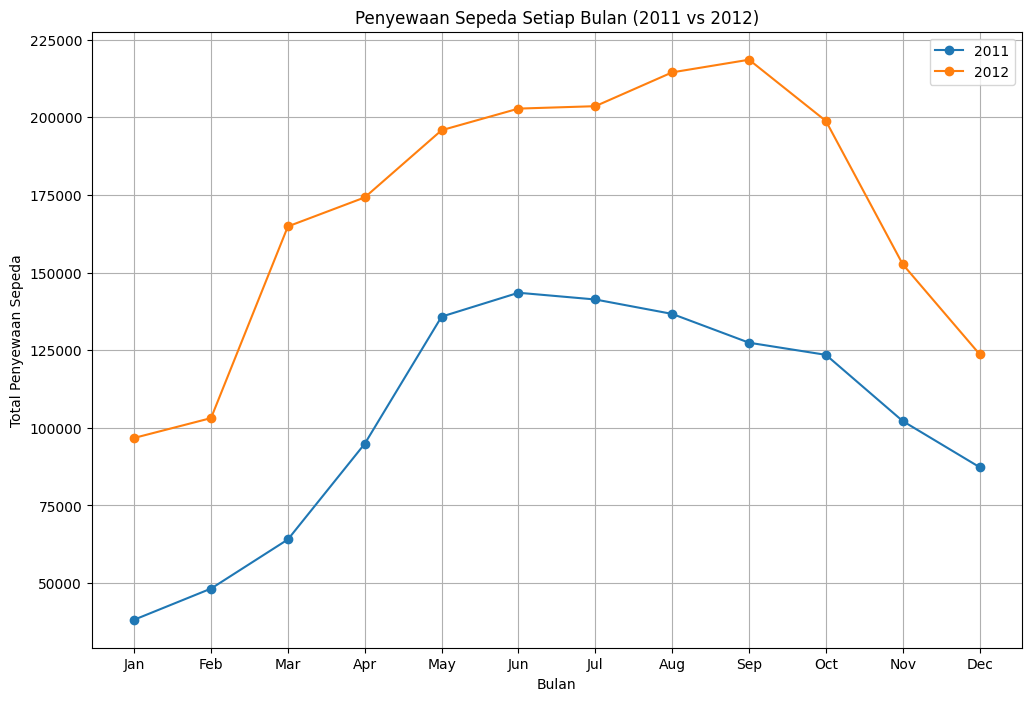

In [53]:
day_df = pd.read_csv('day.csv')

# Melakuka pemisahan data berdasarkan bulan dan tahun
monthly_rentals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack(level=0)

# Mapping kolom untuk plotting
monthly_rentals.columns = ["2011", "2012"]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(monthly_rentals['2011'], label='2011', marker='o')
plt.plot(monthly_rentals['2012'], label='2012', marker='o')
plt.title('Penyewaan Sepeda Setiap Bulan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

**Analisis Jawaban**

* Tahun 2011 dan 2012 menunjukkan pola yang sama, dimana penyewaan sepeda meningkat seiring dengan pergantian menjadi musim panas dan gugur (Juni, Juli, Agustus). Lalu, tren menunjukkan penurunan pada akhir tahun.
* Pada tahun 2012, penyewaan sepeda lebih tinggi dibandingkan tahun 2011 untuk setiap bulannya. Hal ini menunjukkan adanya pertumbuhan dalam penyewaan sepeda. Hal tersebut dapat terjadi karena meningkatnya ketersediaan sepeda, perbaikan infrastruktur, atau kesadaran masyarakat yang lebih besar.

### **Pertanyaan 5: Apakah perubahan kecepatan angin yang signifikan dapat memengaruhi tren penyewaan sepeda pada hari kerja dan akhir pekan?**

*   Specific: Melakukan analisis dampak kecepatan angin terhadap pola penyewaan selama hari kerja dibandingkan akhir pekan.
*   Measurable: Analisis kolom **windspeed** versus **cnt**, lalu membedakan pola antara hari kerja dan akhir pekan.
*   Action-oriented: Menampilkan hasil menggunakan dual-axis line charts untuk membandingkan efek pada hari kerja dan akhir pekan.
*   Relevant: Membantu memahami apakah kondisi cuaca buruk memengaruhi penyewaan sepeda secara berbeda pada hari kerja dan akhir pekan.
*   Time-bound: Semua hari kerja dan akhir pekan




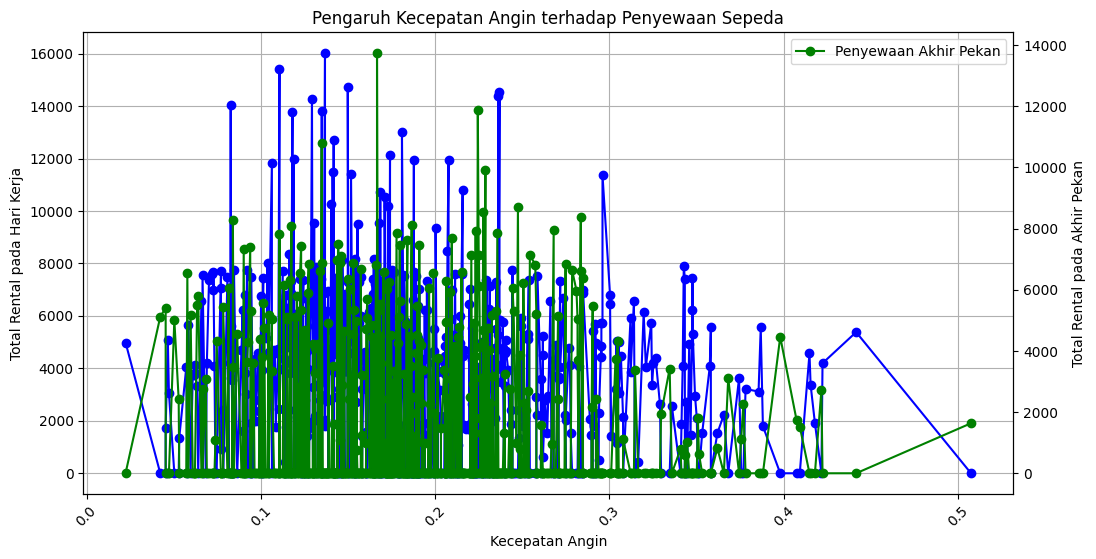

In [54]:
day_df = pd.read_csv('day.csv')

# Mengelompokkan data berdasarkan kecepatan angin dan menghitung jumlah total sewa sepeda untuk hari biasa dan akhir pekan
weekday_data = day_df[day_df['workingday'] == 1].groupby('windspeed')['cnt'].sum()
weekend_data = day_df[day_df['workingday'] == 0].groupby('windspeed')['cnt'].sum()

# Data untuk plotting
combined_data = pd.DataFrame({
    'Penyewaan Hari Kerja': weekday_data,
    'Penyewaan Akhir Pekan': weekend_data
}).fillna(0)
plt.figure(figsize=(12, 6))

# Penyewaan pada hari kerja
plt.subplot(1, 1, 1)
plt.plot(combined_data.index, combined_data['Penyewaan Hari Kerja'], label='Penyewaan Hari Kerja', color='blue', marker='o')
plt.ylabel('Total Rental pada Hari Kerja')
plt.xlabel('Kecepatan Angin')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid()

# Sumbu y kedua untuk penyewaan pada akhir pekan
ax2 = plt.gca().twinx()
ax2.plot(combined_data.index, combined_data['Penyewaan Akhir Pekan'], label='Penyewaan Akhir Pekan', color='green', marker='o')
ax2.set_ylabel('Total Rental pada Akhir Pekan')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

**Analisis Jawaban**

* Penyewaan sepeda pada hari kerja (garis biru) menunjukkan sedikit penurunan seiring dengan meningkatnya kecepatan angin. Hal ini menunjukkan bahwa kondisi angin memengaruhi seseorang akan melakukan penyewaan sepeda atau tidak.
* Penyewaan pada akhir pekan (garis hijau) menunjukkan adanya penurunan yang lebih nyata seiring dengan meningkatnya kecepatan angin. Hal ini menunjukkan bahwa penyewa sepeda pada akhir pekan lebih sensitif terhadap kondisi angin dibandingkan dengan penyewa sepeda pada hari kerja.
* Penyewaan sepeda pada hari kerja dan akhir pekan dipengaruhi oleh kecepatan angin, tetapi akhir pekan menunjukkan dampak yang lebih besar.

## Analisis Lanjutan (Opsional)

### **RFM Analysis**

RFM Analysis bertujuan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama, yaitu:
1. Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
2. Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
3. Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [55]:
day_df = pd.read_csv('day.csv')
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
last_date = day_df['dteday'].max()

# RFM analysis untuk registered users
RFM_registered = day_df.groupby('registered').agg(
    Frequency = ('cnt', 'sum'),
    Monetary = ('cnt', 'sum'),
    Recency = ('dteday', lambda x: (last_date - x.max()).days)
).reset_index()
RFM_registered['UserID'] = 'Registered'

# RFM analysis untuk casual users
RFM_casual = day_df.groupby('casual').agg(
    Frequency = ('cnt', 'sum'),
    Monetary = ('cnt', 'sum'),
    Recency = ('dteday', lambda x: (last_date - x.max()).days)
).reset_index()
RFM_casual['UserID'] = 'Casual'

# Menggabungkan kedua RFM ke dalam satu dataframe
RFM_combined = pd.concat([RFM_registered, RFM_casual], ignore_index=True)
print(RFM_combined)

      registered  Frequency  Monetary  Recency      UserID  casual
0           20.0         22        22       63  Registered     NaN
1          416.0        431       431      704  Registered     NaN
2          432.0        441       441        5  Registered     NaN
3          451.0        754       754      372  Registered     NaN
4          472.0        506       506      705  Registered     NaN
...          ...        ...       ...      ...         ...     ...
1280         NaN       7836      7836      289      Casual  3155.0
1281         NaN       8714      8714      107      Casual  3160.0
1282         NaN       6857      6857      268      Casual  3252.0
1283         NaN       6591      6591      218      Casual  3283.0
1284         NaN       8294      8294      226      Casual  3410.0

[1285 rows x 6 columns]


## Conclusion

###  **Conclusion Pertanyaan 1**

***Question***

Apakah ada perbedaan signifikan untuk penyewaan sepeda antara hari libur dan hari biasa pada setiap bulan untuk tahun 2011 dan 2012?

***Conclusion***

Analisis menunjukkan bahwa harga sewa sepeda umumnya lebih tinggi pada hari-hari biasa. Hal ini menunjukkan pola penggunaan yang lebih konsisten karena hari-hari biasa mencakup hari kerja. Sebaliknya, hari libur menunjukkan jumlah sewa yang lebih rendah dan variabilitas yang lebih besar. Hal ini kemungkinan disebabkan karena pengguna melakukan aktivitas lain atau bepergian.

### **Conclusion Pertanyaan 2**

***Question***

Jam berapakah yang merupakan jam sibuk penyewaan sepeda pada hari kerja dan akhir pekan di tahun 2012?

***Conclusion***

Analisis menunjukkan bahwa penyewaan sepeda pada hari kerja mencapai puncaknya pada jam perjalanan pulang pergi kerja, dengan peningkatan yang signifikan sekitar pukul 08.00 dan 17.00. Sebaliknya, penyewaan di akhir pekan lebih tersebar, mencapai puncaknya antara pukul 12.00 dan 16.00. Hal ini sangat penting untuk mengoptimalkan ketersediaan staf dan sepeda selama periode permintaan tinggi.


### **Conclusion Pertanyaan 3**

***Question***

Bagaimana distribusi penyewaan oleh pengguna biasa dengan penyewaan oleh pengguna terdaftar selama jam sibuk penyewaan di berbagai musim?

***Conclusion***

Analisis menunjukkan bahwa pengguna biasa lebih banyak terjadi di musim semi dan musim panas. Sebaliknya, pengguna terdaftar secara konsisten mendominasi di semua musim, terutama di musim panas. Memahami dinamika penyewaan oleh pengguna biasa dan pengguna terdaftar dapat menjadikan informasi untuk strategi pemasaran yang ditargetkan dan mengoptimalkan keputusan operasional terkait dengan ketersediaan staf dan sepeda selama jam sibuk.

### **Conclusion Pertanyaan 4**

***Question***

Bagaimana perbandingan tren bulanan penyewaan sepeda antara tahun 2011 dan 2012?

***Conclusion***

Analisis menunjukkan bahwa penyewaan sepeda meningkat pada tahun 2011 dan 2012. Pada tahun 2011 dan 2012, penyewaan mencapai puncaknya selama bulan musim panas dan menurun menjelang akhir tahun. Khususnya, pada tahun 2012 terdapat angka sewa yang secara konsisten lebih tinggi dibandingkan tahun 2011, yang menunjukkan adanya pertumbuhan dalam penggunaan layanan penyewaan sepeda.

### **Conclusion Pertanyaan 5**

***Question***

Apakah perubahan kecepatan angin yang signifikan dapat memengaruhi tren penyewaan sepeda pada hari kerja dan akhir pekan?

***Conclusion***

Analisis menunjukkan bahwa kecepatan angin berdampak negatif terhadap penyewaan sepeda, baik pada hari kerja maupun akhir pekan, dengan dampak yang lebih nyata pada akhir pekan. Para penyewa sepeda pada hari kerja cukup terhambat oleh kondisi angin sedang, sementara penyewa sepeda pada akhir pekan menunjukkan penyewaan yang lebih rendah daripada penyewa pada hari kerja pada hari-hari berangin. Memahami dinamika ini dapat meningkatkan strategi ketersediaan staf dan sepeda selama kondisi cuaca buruk.


## Menyimpan Data ke dalam .csv untuk Streamlit

In [56]:
day_df.to_csv("days_clean.csv", index = False)
hour_df.to_csv("hours_clean.csv", index = False)